## Airbnb Booking Analysis

In [83]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Import data

In [84]:
Data=pd.read_csv(r"Airbnb NYC 2019.csv")
Data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


## Data Exploration and Cleaning


In [85]:
Data.head().T

,0,1,2,3,4
id,2539,2595,3647,3831,5022
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park
host_id,2787,2845,4632,4869,7192
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
price,149,225,150,89,80


In [86]:
Data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [87]:
rename_col={'id':'listing_id','name':'listing_Name','number_of_reviews':'Total_reviews','calculated_host_listings_count':'host_listing_count'}

In [88]:
Data= Data.rename(columns=rename_col)
Data.head().T

,0,1,2,3,4
listing_id,2539,2595,3647,3831,5022
listing_Name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park
host_id,2787,2845,4632,4869,7192
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
price,149,225,150,89,80


In [89]:
Data.shape

(48895, 16)

In [90]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   listing_id           48895 non-null  int64  
 1   listing_Name         48879 non-null  object 
 2   host_id              48895 non-null  int64  
 3   host_name            48874 non-null  object 
 4   neighbourhood_group  48895 non-null  object 
 5   neighbourhood        48895 non-null  object 
 6   latitude             48895 non-null  float64
 7   longitude            48895 non-null  float64
 8   room_type            48895 non-null  object 
 9   price                48895 non-null  int64  
 10  minimum_nights       48895 non-null  int64  
 11  Total_reviews        48895 non-null  int64  
 12  last_review          38843 non-null  object 
 13  reviews_per_month    38843 non-null  float64
 14  host_listing_count   48895 non-null  int64  
 15  availability_365     48895 non-null 

In [91]:
#check duplicates in the dataset
Data=Data.drop_duplicates()
Data.count()

listing_id             48895
listing_Name           48879
host_id                48895
host_name              48874
neighbourhood_group    48895
neighbourhood          48895
latitude               48895
longitude              48895
room_type              48895
price                  48895
minimum_nights         48895
Total_reviews          48895
last_review            38843
reviews_per_month      38843
host_listing_count     48895
availability_365       48895
dtype: int64

In [92]:
#check null values of each column
Data.isnull().sum()

listing_id                 0
listing_Name              16
host_id                    0
host_name                 21
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
Total_reviews              0
last_review            10052
reviews_per_month      10052
host_listing_count         0
availability_365           0
dtype: int64

In [93]:
# filling null values 
Data['listing_Name'].fillna('unknown', inplace=True)
Data['host_name'].fillna('no_name',inplace=True)

In [94]:
# null values are removed
Data[['listing_Name','host_name']].isnull().sum()

listing_Name    0
host_name       0
dtype: int64

In [95]:
#the column last_review is not important in this analysis
Data=Data.drop(['last_review'],axis=1)

In [96]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   listing_id           48895 non-null  int64  
 1   listing_Name         48895 non-null  object 
 2   host_id              48895 non-null  int64  
 3   host_name            48895 non-null  object 
 4   neighbourhood_group  48895 non-null  object 
 5   neighbourhood        48895 non-null  object 
 6   latitude             48895 non-null  float64
 7   longitude            48895 non-null  float64
 8   room_type            48895 non-null  object 
 9   price                48895 non-null  int64  
 10  minimum_nights       48895 non-null  int64  
 11  Total_reviews        48895 non-null  int64  
 12  reviews_per_month    38843 non-null  float64
 13  host_listing_count   48895 non-null  int64  
 14  availability_365     48895 non-null  int64  
dtypes: float64(3), int64(7), object(5)
m

In [97]:
Data.head()

,listing_id,listing_Name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,Total_reviews,reviews_per_month,host_listing_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [98]:
Data.nunique()

listing_id             48895
listing_Name           47906
host_id                37457
host_name              11453
neighbourhood_group        5
neighbourhood            221
latitude               19048
longitude              14718
room_type                  3
price                    674
minimum_nights           109
Total_reviews            394
reviews_per_month        937
host_listing_count        47
availability_365         366
dtype: int64

In [99]:
Data.describe()

,listing_id,host_id,latitude,longitude,price,minimum_nights,Total_reviews,reviews_per_month,host_listing_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### removing outliers using IQR technique

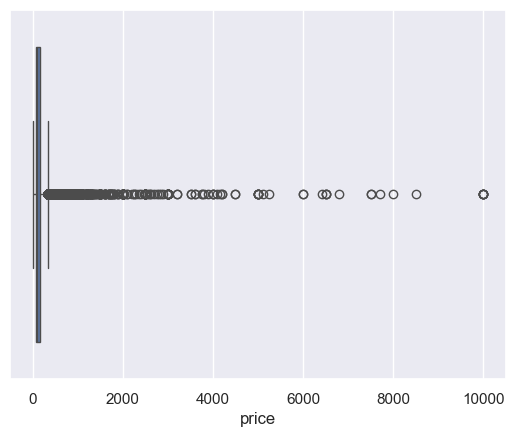

In [100]:
sns.boxplot(x=Data['price'])
plt.show()

In [101]:
# create a outlier function to remove outliers from important columns
def outlier_detection(data_col):
    Q1=np.percentile(data_col,25)
    Q3=np.percentile(data_col,75)
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    
    return lower_range,upper_range

In [102]:
lower_bound,upper_bound = outlier_detection(Data['price'])
Data = Data[(Data.price>lower_bound) & (Data.price<upper_bound)]

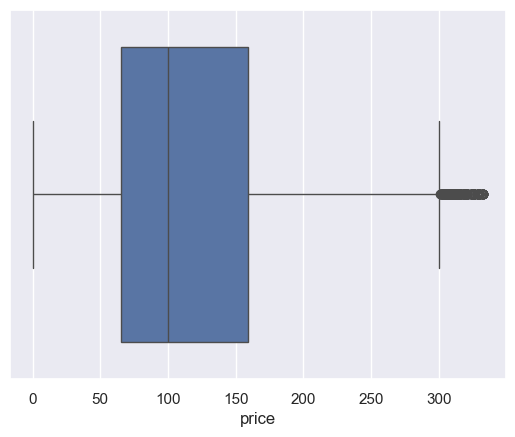

In [103]:
sns.boxplot(x=Data['price'])
plt.show()

In [104]:
#max price after removing outliers\
print(Data['price'].max())

333


### Distribution of airbnb prices using histogram


C:\Users\mosta\AppData\Local\Temp\ipykernel_6080\4065350794.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data['price'],color=('r'))


Text(0.5, 1.0, 'Distribution of Airbnb Prices')

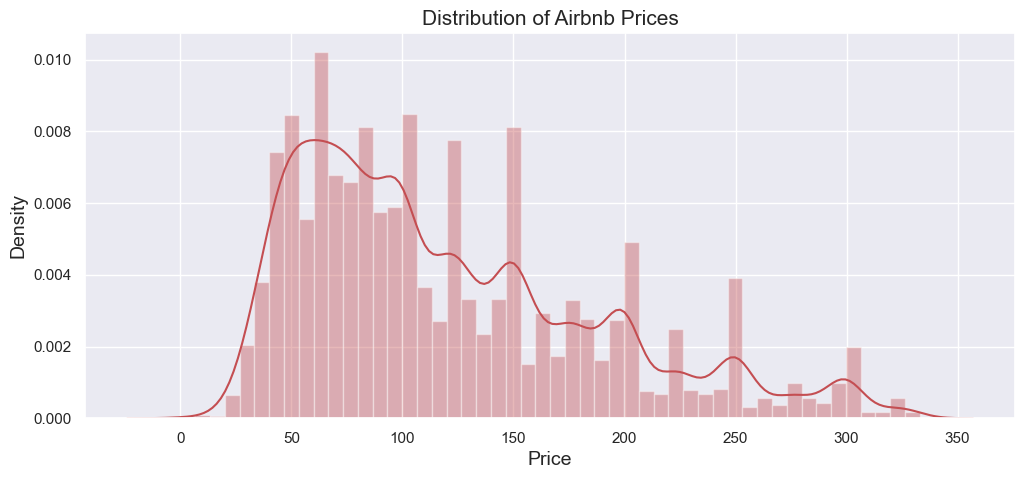

In [105]:
# Create a figure with a custom size
plt.figure(figsize=(12, 5))

# Set the seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

# Create a histogram of the 'price' column using distplot
sns.distplot(Data['price'],color=('r'))

# Add labels to the x-axis and y-axis
plt.xlabel('Price', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add a title to the plot
plt.title('Distribution of Airbnb Prices',fontsize=15)


### Neighbourhood group by listing count

In [106]:
# create a dataframe for Neighbourhood group and listing_count from Data

counts= Data["neighbourhood_group"].value_counts()

top_neighbourhood_groups=counts.reset_index()

top_neighbourhood_groups.columns=['Neighbourhood_group','Listing_counts']

top_neighbourhood_groups



,Neighbourhood_group,Listing_counts
0,Manhattan,19501
1,Brooklyn,19415
2,Queens,5567
3,Bronx,1070
4,Staten Island,365


Text(0, 0.5, 'total listings counts')

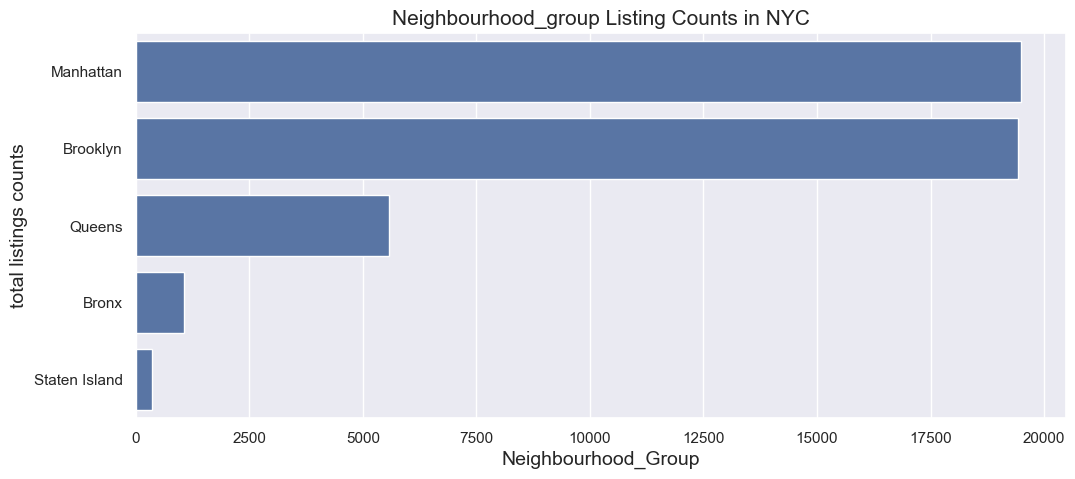

In [107]:
# Set the figure size
plt.figure(figsize=(12, 5))

# Create a countplot of the neighbourhood group data
sns.countplot(Data['neighbourhood_group'],order=Data['neighbourhood_group'].value_counts().index)

# Set the title of the plot
plt.title('Neighbourhood_group Listing Counts in NYC', fontsize=15)

# Set the x-axis label
plt.xlabel('Neighbourhood_Group', fontsize=14)

# Set the y-axis label
plt.ylabel('total listings counts', fontsize=14)

### Average price in each neighbourhood group

In [108]:
# group data by neighbourhood group and get the average price in each group by mean function
grouped=Data.groupby("neighbourhood_group").mean('price')

neighbourhood_group_avg_price=grouped.reset_index()
# round the average to 2 number of digits and rename columns
neighbourhood_group_avg_price=round(neighbourhood_group_avg_price.rename(columns={'price':'avg_price'}),2)

neighbourhood_group_avg_price[['neighbourhood_group','avg_price']]

,neighbourhood_group,avg_price
0,Bronx,77.37
1,Brooklyn,105.70
2,Manhattan,145.90
3,Queens,88.90
4,Staten Island,89.24


Text(0.5, 1.0, 'Neighbourhood_group by average_price')

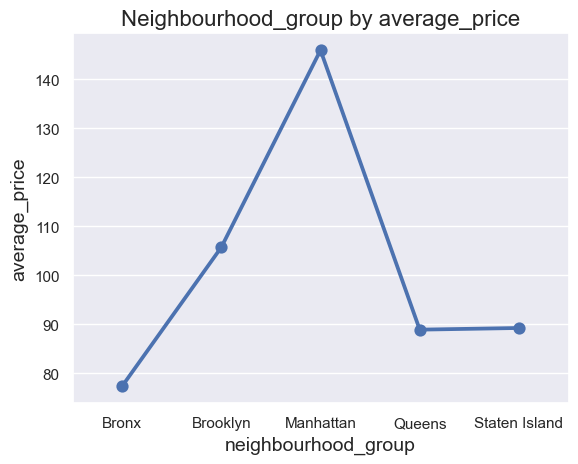

In [109]:
#visualize average price per neighbourhood group using point plot
sns.pointplot(x=neighbourhood_group_avg_price['neighbourhood_group'],y=neighbourhood_group_avg_price['avg_price'])

#set the x-axis label
plt.xlabel('neighbourhood_group',fontsize=14)

#set the y-axis label
plt.ylabel('average_price',fontsize=14)

#set the Title of the plot
plt.title('Neighbourhood_group by average_price',fontsize=16)

### top 10 neighbourhoods by listing count

In [110]:
top_neighbourhood=Data["neighbourhood"].value_counts()[:10].reset_index()
top_neighbourhood.columns=['neighbourhood','listing_count']
top_neighbourhood

,neighbourhood,listing_count
0,Williamsburg,3732
1,Bedford-Stuyvesant,3638
2,Harlem,2585
3,Bushwick,2438
4,Upper West Side,1788
5,Hell's Kitchen,1731
6,East Village,1714
7,Upper East Side,1670
8,Crown Heights,1519
9,Midtown,1143


C:\Users\mosta\AppData\Local\Temp\ipykernel_6080\3072119215.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_neighbourhood["neighbourhood"],y=top_neighbourhood["listing_count"],palette='deep')


Text(0.5, 1.0, 'Neighbourhood by listing count')

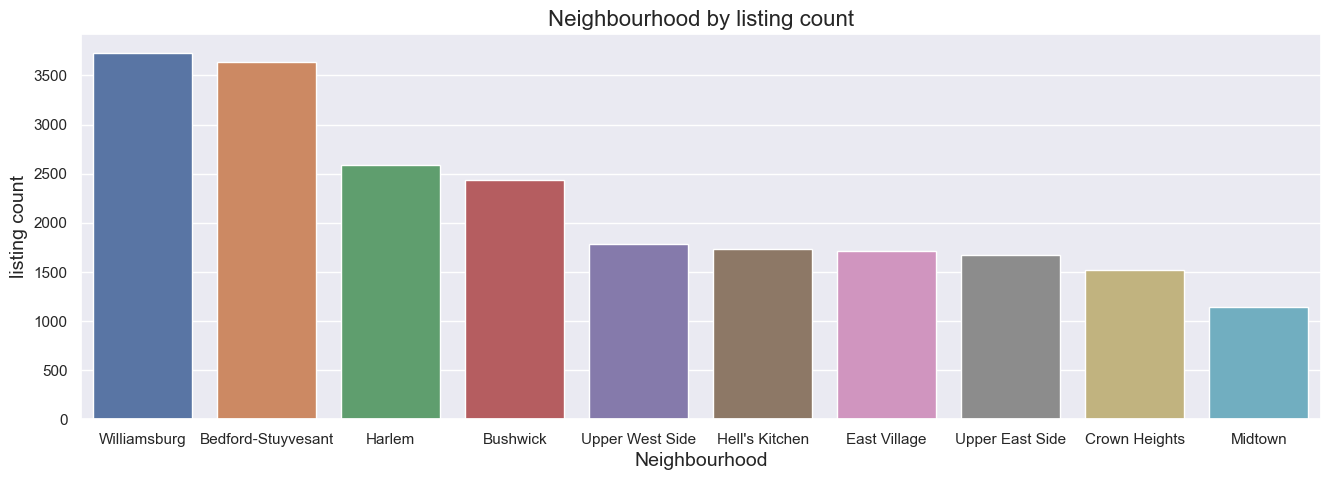

In [111]:
plt.figure(figsize=(16, 5))

#visualize top neighbourhoods using barchart
sns.barplot(x=top_neighbourhood["neighbourhood"],y=top_neighbourhood["listing_count"],palette='deep')

#set x-axis label
plt.xlabel('Neighbourhood',fontsize=14)

#set y-axis label
plt.ylabel('listing count',fontsize=14)

#set the title of the plot
plt.title('Neighbourhood by listing count',fontsize=16)

### top 10 hosts by number of listings


In [112]:
top_hosts=Data["host_name"].value_counts()[:10].reset_index()
top_hosts.columns=['host_name','NO_of_listings']
top_hosts

,host_name,NO_of_listings
0,Michael,383
1,David,368
2,John,276
3,Sonder (NYC),272
4,Alex,253
5,Sarah,221
6,Daniel,212
7,Maria,197
8,Jessica,185
9,Mike,184


C:\Users\mosta\AppData\Local\Temp\ipykernel_6080\1445670134.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hosts['host_name'],y=top_hosts['NO_of_listings'],palette='deep')


Text(0.5, 1.0, 'No of listings by host')

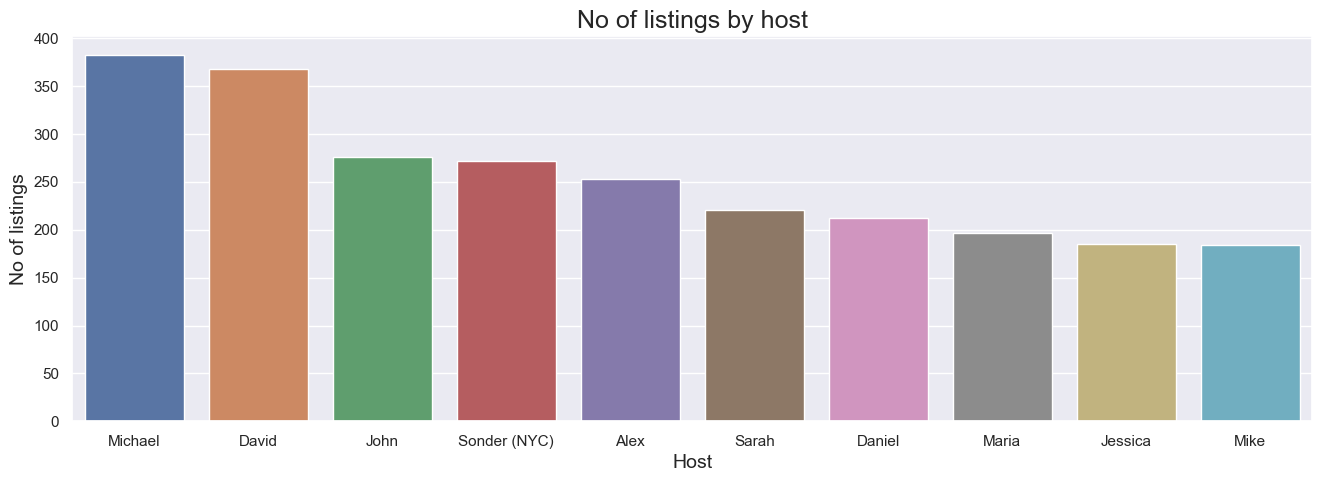

In [113]:
plt.figure(figsize=(16, 5))

#visualize top hosts using barchart
sns.barplot(x=top_hosts['host_name'],y=top_hosts['NO_of_listings'],palette='deep')

#set x-label
plt.xlabel('Host',fontsize=14)

#set y-label
plt.ylabel('No of listings',fontsize=14)

#set the title of the plot
plt.title('No of listings by host',fontsize=18)


### neighbourhood group by number of hosts

In [114]:
grouping=Data.groupby("neighbourhood_group")
hosts_per_location=grouping["host_name"].count().reset_index()
hosts_per_location.columns=['neighbourhood_group','host_counts']
hosts_per_location

,neighbourhood_group,host_counts
0,Bronx,1070
1,Brooklyn,19415
2,Manhattan,19501
3,Queens,5567
4,Staten Island,365


Text(0.5, 1.0, 'Numbewr of active hosts by location')

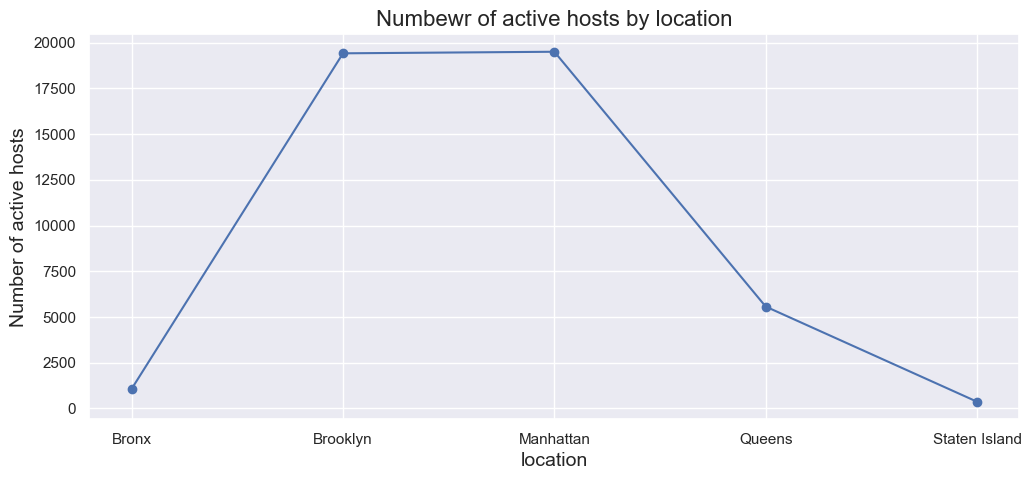

In [115]:
plt.figure(figsize=(12, 5))

#visualize negighbourhood group by number of hosts using line chart
plt.plot(hosts_per_location['neighbourhood_group'],hosts_per_location['host_counts'], marker='o')

#set x-label
plt.xlabel('location',fontsize=14)

#set y-label
plt.ylabel('Number of active hosts',fontsize=14)

#set the title of the plot
plt.title('Numbewr of active hosts by location',fontsize=16)

### number of rooms by type

In [116]:
top_room =Data['room_type'].value_counts().reset_index()
top_room.columns=['room_type','count_room_type']
top_room

,room_type,count_room_type
0,Entire home/apt,22784
1,Private room,21996
2,Shared room,1138


Text(0.5, 1.0, 'Top room Types')

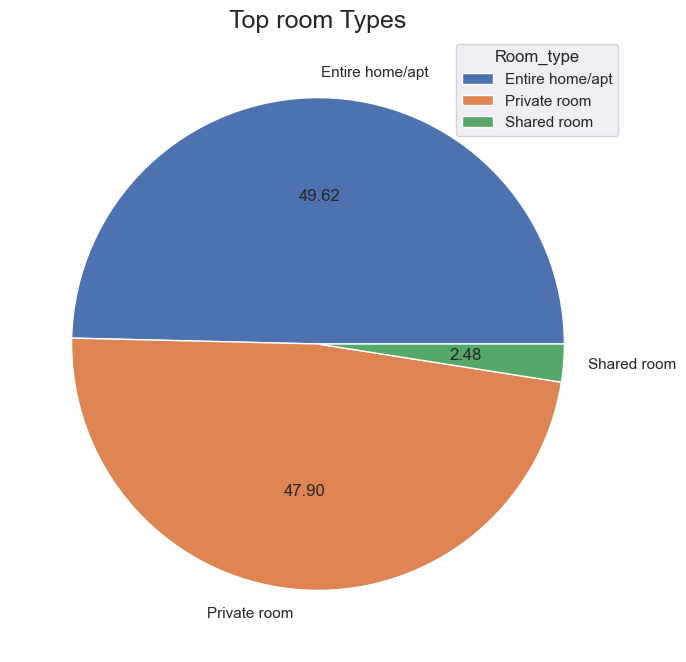

In [117]:
plt.figure(figsize=(12, 8))

#visualize number of room type using pie chart
plt.pie(top_room['count_room_type'],labels=top_room['room_type'],autopct='%.2f')

#set legend to the chart
plt.legend(title='Room_type')

#set title to the chart
plt.title('Top room Types',fontsize=18)


### minimum nights density

In [118]:
#group the dataframe by the minimum_nights column and count the number of rows in each group 
min_nights_count=Data.groupby('minimum_nights').size().reset_index(name='count')

min_nights_count=min_nights_count.sort_values('count',ascending=False)

min_nights_count=min_nights_count.head(15)


Text(0.5, 1.0, 'Minimum Nights density')

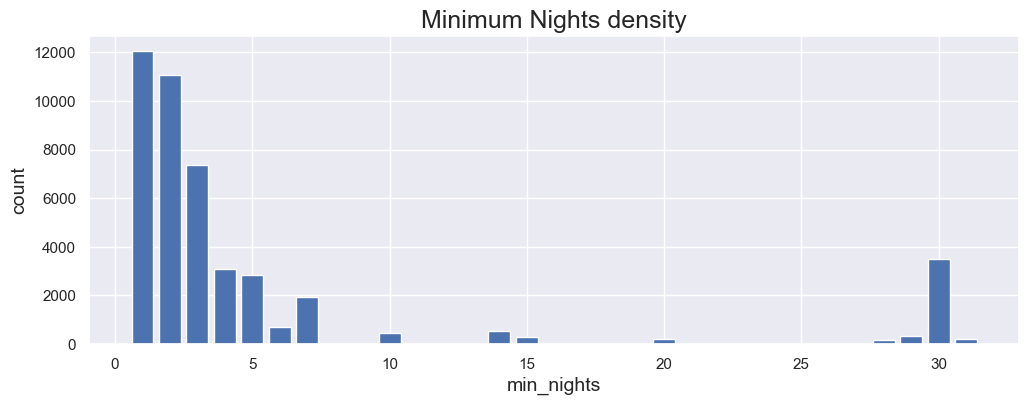

In [119]:
plt.figure(figsize=(12, 4))

#visualize minimum nights density using bar chart
plt.bar(min_nights_count['minimum_nights'],min_nights_count['count'])

#set x-axis label
plt.xlabel('min_nights',fontsize=14)

#set y-axis label
plt.ylabel('count',fontsize=14)

#set title for the chart
plt.title('Minimum Nights density',fontsize=18)

### total reviews by neighbourhood group

In [120]:
total_reviews_by_neighbourhood_group=Data.groupby('neighbourhood_group')
total_reviews_by_neighbourhood_group=total_reviews_by_neighbourhood_group['Total_reviews'].sum().reset_index().sort_values('Total_reviews', ascending=False)
total_reviews_by_neighbourhood_group

,neighbourhood_group,Total_reviews
1,Brooklyn,475936
2,Manhattan,428128
3,Queens,155719
0,Bronx,28185
4,Staten Island,11536


C:\Users\mosta\AppData\Local\Temp\ipykernel_6080\1377222626.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lable,y=value,palette='deep')


Text(0.5, 1.0, 'Total reviews by Neighbourhood group')

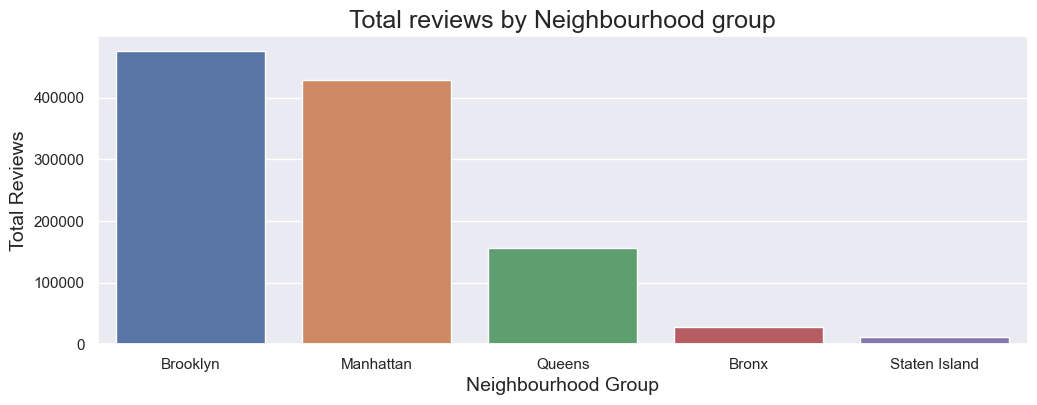

In [121]:
lable=total_reviews_by_neighbourhood_group['neighbourhood_group']
value=total_reviews_by_neighbourhood_group['Total_reviews']

plt.figure(figsize=(12, 4))

#visualise total reviews by neighbourhood group using barplot
sns.barplot(x=lable,y=value,palette='deep')

#set x-axis label
plt.xlabel('Neighbourhood Group',fontsize=14)

#set y-axis label
plt.ylabel('Total Reviews',fontsize=14)

#set title for the chart
plt.title('Total reviews by Neighbourhood group',fontsize=18)
